In [164]:
import numpy as np
import pandas as pd
import numpy.linalg as LA
import scipy

## part 4

In [2]:
# part a)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
X = np.array( [[0.2, 3.1, 1],[1, 3, 1],[-0.2, 1.2, 1],[1, 1.1, 1]] )
W0=np.array([-1,1,0])
Y=np.array([1,1,0,0])

In [4]:
S0=sigmoid(X.dot(W0))
S0

array([ 0.94784644,  0.88079708,  0.80218389,  0.52497919])

In [5]:
# part b)
def update_newton(X, Wi,S,Y):
    matrix=np.diag([s*(1-s) for s in S])
    return Wi-LA.inv(X.T@matrix@X)@(-X.T@(Y-S))

In [6]:
W1=update_newton(X,W0,S0,Y)
W1

array([ 1.32465198,  3.04991697, -6.82910388])

In [7]:
S1=sigmoid(X.dot(W1))
S1

array([ 0.94737826,  0.97455097,  0.03124556,  0.10437391])

In [8]:
W2=update_newton(X,W1,S1,Y)
W2

array([ 1.36602464,  4.15753654, -9.19961627])

# part 3 Wine Classification

In [46]:
from scipy import io
wine=io.loadmat('data/data.mat')
wine

{'X': array([[  5.8  ,   0.555,   0.26 , ...,   0.46 ,   9.1  ,   0.5  ],
        [  6.3  ,   0.36 ,   0.19 , ...,   0.52 ,  12.7  ,   0.6  ],
        [  6.4  ,   0.21 ,   0.5  , ...,   0.43 ,   8.8  ,   0.5  ],
        ..., 
        [  7.3  ,   0.2  ,   0.37 , ...,   0.49 ,  10.9  ,   0.6  ],
        [  8.5  ,   0.25 ,   0.27 , ...,   0.33 ,  12.   ,   0.6  ],
        [  6.6  ,   0.36 ,   0.21 , ...,   0.41 ,   9.9  ,   0.6  ]]),
 'X_test': array([[  7.1 ,   0.85,   0.49, ...,   0.36,  10.7 ,   0.5 ],
        [  7.3 ,   0.32,   0.23, ...,   0.46,   8.7 ,   0.5 ],
        [  6.2 ,   0.55,   0.45, ...,   0.5 ,   9.3 ,   0.6 ],
        ..., 
        [ 10.2 ,   0.34,   0.48, ...,   0.69,  12.1 ,   0.7 ],
        [  7.1 ,   0.12,   0.3 , ...,   0.52,  11.9 ,   0.7 ],
        [ 13.  ,   0.32,   0.65, ...,   0.61,  10.6 ,   0.5 ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Feb 25 11:34:45 2020',
 '__version__': '1.0',
 'y': array([[ 0.],
     

In [47]:
designX=pd.DataFrame(wine['X'])
designX=(designX-designX.mean())/designX.std()
designX['12']=1
designX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.094188,1.315521,-0.406200,-0.199821,-0.086491,-0.757844,0.177866,-0.131510,0.136822,-0.475475,-1.166725,-0.935696,1
1,-0.708024,0.126981,-0.889225,-0.472441,0.537104,-0.870042,-1.360061,0.300717,2.130895,-0.072065,1.851512,0.200777,1
2,-0.630791,-0.787281,1.249883,1.289101,-0.398288,0.812933,0.655154,0.832688,-0.424010,-0.677180,-1.418245,-0.935696,1
3,-0.476326,-0.055872,-0.544207,2.222299,-0.313252,0.027545,0.549090,1.171820,-0.860214,-0.072065,-1.082885,-0.935696,1
4,-0.630791,-0.665379,0.076824,-0.902341,-0.341597,-0.841993,1.795342,-0.896219,0.697655,-0.609945,0.426233,0.200777,1


### 1) Batch Gradient Descent Update

$W^{(t+1)} =W^{(t)} - \epsilon(\lambda W^{(t)} - X^{T}(y - S(XW^{(t)} )))  $

### 2) Batch Gradient Descent Code

In [141]:
def cost(X, w, lamb,y, reg):
    first=scipy.special.expit(X@w)
    second=1-scipy.special.expit(X@w)
    for i in range(len(first)):
        if first[i]<0.0001:
            first[i]=0.0001
        if second[i]<0.0001:
            second[i]=0.0001
        if first[i]>0.9999:
            first[i]=0.9999
        if second[i]>0.9999:
            second[i]=0.9999
    if reg==True:
        return LA.norm(w)**2*lamb/2-y.dot(np.log(first))-(1-y).dot((np.log(second)))
    else:
        return -y.dot(np.log(first))-(1-y).dot((np.log(second)))

In [49]:
y=pd.DataFrame(wine['y'])[0]

In [212]:
def batch_gradient(starting_point, lamb, eps, X,y, iterations):
    weights=[starting_point]
    curr=starting_point
    for i in range(iterations):
        curr=curr-eps*(lamb*curr-X.T@(np.array(y-scipy.special.expit(X@curr))))
        weights.append(curr)
    return weights

In [213]:
#Here I use lambda=0.001, step size=0.01
#Hyperparameter tuning process/validation down below)
costlist=[]
for iteration in [50,100,200,300,400,600,800,1000,3000,6000]:
    w=batch_gradient(np.zeros(13), 0.001, 0.01, designX, y, iteration)[-1]
    costlist.append(cost(designX, w, 0.1,y,True))
    

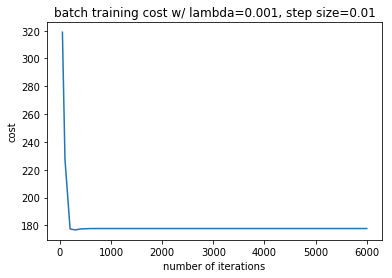

In [214]:
import matplotlib.pyplot as plt
plt.plot([50,100,200,300,400,600,800,1000,3000,6000],costlist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('batch training cost w/ lambda=0.001, step size=0.01')
plt.show()

In [14]:
temp=designX
temp['label']=y

In [15]:
X_train=temp.sample(frac=5/6,random_state=200) #random state is a seed value
X_validation=temp.drop(X_train.index)
X_train=X_train.reset_index(drop=True)
X_validation=X_validation.reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,0.527699,-0.604428,0.559848,-0.807973,-0.001455,-1.094439,-1.607544,0.666447,0.635340,2.281162,-1.502085,0.200777,1,1.0
1,0.296001,0.858390,-0.061183,-0.556324,0.395378,-1.487133,-1.784317,0.742918,0.012193,0.129640,-0.160646,0.200777,1,1.0
2,-0.630791,-0.177773,0.559848,0.198623,-0.483323,0.476338,1.326893,0.144450,-0.486325,-0.072065,-0.579846,-0.935696,1,0.0
3,-0.939722,-0.787281,-0.130187,0.680950,-0.568359,0.925132,0.195544,-0.337649,-0.237066,-0.946121,0.090874,-0.935696,1,0.0
4,0.836629,-0.482527,0.697855,-0.724090,0.678830,-1.094439,-1.572189,0.899184,-0.050122,1.810517,-0.915205,0.200777,1,1.0


In [184]:
## tuning lambda and step size using cost function
costdict=dict()
for lamb in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-1,1]:
    for eps in [1e-5,1e-4,1e-3,1e-2,1e-1,0.5]:
        costs=[]
        for iteration in [50,100,200,300,400,600,800,1000,3000]:
            w=batch_gradient(np.zeros(13), lamb, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
            costs.append(cost(X_validation.drop(['label'],axis=1), w, lamb,X_validation['label'],reg=False))
        costdict[(lamb,eps)]=costs
        #print('lambda='+str(lamb)+", step size="+str(eps)+str(costdict[(lamb,eps)]))

In [185]:
#only plot 30% of them with lowest cost
interested=dict()
for i in costdict:
    if costdict[i][-1]<np.percentile([costdict[i][-1] for i in costdict],30):
        interested[i]=costdict[i]

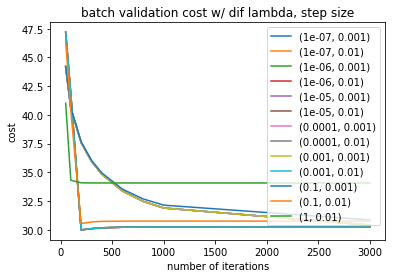

In [199]:
for i in interested:
    plt.plot([50,100,200,300,400,600,800,1000,3000],costdict[i],label=i)
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('batch validation cost w/ dif lambda, step size')
plt.show()
#optimal combination is lambda:0.001, step size=0.01

In [ ]:
## down below are my experiments with different lambda, step size using both cost and accuracy
## tuning lambda use cost function
#i=0
#costlist=[[],[],[],[],[],[],[],[]]
#for lamb in [1e-7,1e-5,1e-3,1e-1,0.5,1,3,5]:
    #for iteration in [50,100,200,300,400,600,800,1000,3000]:
        #w=batch_gradient(np.zeros(13), lamb, 1e-2, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        #costlist[i].append(cost(X_validation.drop(['label'],axis=1), w, lamb,X_validation['label'],reg=False))
    #print(costlist[i])
    #i+=1

In [190]:
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[0],label=('lambda=1e-7'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[1],label=('lambda=1e-5'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[2],label=('lambda=1e-3'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[3],label=('lambda=1e-1'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[4],label=('lambda=0.5'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[5],label=('lambda=1'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[6],label=('lambda=3'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[7],label=('lambda=5'))
# plt.legend()
# plt.xlabel('number of iterations')
# plt.ylabel('cost')
# plt.title('validation cost')
# plt.show()
# #choose lambda=1e-3

In [191]:
# ## tuning step size using cost function
# i=0
# costlist2=[[],[],[],[],[],[],[],[]]
# for eps in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0.5]:
#     for iteration in [50,100,200,300,400,600,800,1000,3000]:
#         w=batch_gradient(np.zeros(13), 0.001, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
#         costlist2[i].append(cost(X_validation.drop(['label'],axis=1), w, 0.001,X_validation['label'],False))
#     print(costlist2[i])
#     i+=1

In [192]:
# #draw cost function, tuning eps
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[0],label=('eps=1e-7'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[1],label=('eps=1e-6'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[2],label=('eps=1e-5'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[3],label=('eps=1e-4'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[4],label=('eps=1e-3'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[5],label=('eps=1e-2'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[6],label=('eps=1e-1'))
# plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[7],label=('eps=0.5'))

# plt.legend()
# plt.xlabel('number of iterations')
# plt.ylabel('cost')
# plt.title('validation cost')
# plt.show()
# #choose step size=1e-2

In [23]:
def classifier(X,w):
    prediction=np.zeros(X.shape[0])
    s=scipy.special.expit(np.dot(X,w))
    for i in range(X.shape[0]):
        if s[i]>=0.5:
            prediction[i]=1
        else:
            prediction[i]=0
    return prediction

def accuracy(pred, actual):
    return sum(pred==actual)/len(pred)
    


In [63]:
## tuning lambda using accuracy
i=0
accuracy=[[],[],[],[],[],[],[],[]]
for lamb in [1e-7,1e-5,1e-3,1e-1,0.5,1,3,5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=batch_gradient(np.zeros(13), lamb, 1e-2, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        prediction=classifier(X_validation.drop(['label'],axis=1),w)
        actual=X_validation['label']
        accuracy[i].append(sum(prediction==actual)/len(prediction))
    print(accuracy[i])
    i+=1

[0.99099999999999999, 0.99299999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999]
[0.99099999999999999, 0.99299999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999]
[0.99099999999999999, 0.99299999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999]
[0.99099999999999999, 0.99299999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999]
[0.99099999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999, 0.99399999999999999]
[0.99299999999999999, 0.99399999999999999, 0.99399

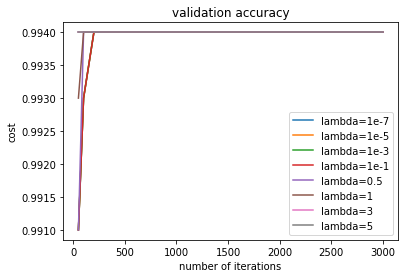

In [65]:
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[0],label=('lambda=1e-7'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[1],label=('lambda=1e-5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[2],label=('lambda=1e-3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[3],label=('lambda=1e-1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[4],label=('lambda=0.5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[5],label=('lambda=1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[6],label=('lambda=3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[7],label=('lambda=5'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation accuracy')
plt.show()
#no huge difference

In [66]:
## tuning step size using accuracy
i=0
accuracy=[[],[],[],[],[],[],[],[]]
for eps in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0.5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=batch_gradient(np.zeros(13), 0.001, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        prediction=classifier(X_validation.drop(['label'],axis=1),w)
        actual=X_validation['label']
        accuracy[i].append(sum(prediction==actual)/len(prediction))
    i+=1

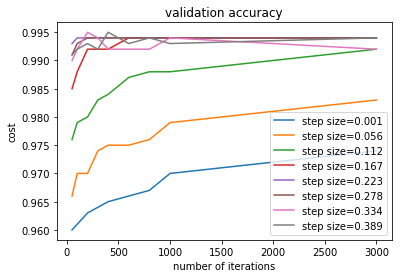

In [67]:
#draw cost function, tuning eps
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[0],label=('step size=0.001'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[1],label=('step size=0.056'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[2],label=('step size=0.112'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[3],label=('step size=0.167'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[4],label=('step size=0.223'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[5],label=('step size=0.278'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[6],label=('step size=0.334'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[7],label=('step size=0.389'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation accuracy')
plt.show()
#optimal step size=0.278

### 3) Stochastic Gradient Descent Update

$W^{(t+1)} =W^{(t)} - \epsilon(\lambda W^{(t)} - X_{i*}^{T}(y_{i} - S(X_{i*}W^{(t)} ))) $ where $X_{i*}$ is the random i_th row of X

### 4) Stochastic Gradient Descent Code

In [279]:
def stochastic_gradient(starting_point, lamb, eps, X,y, iterations):
    weights=[starting_point]
    curr=starting_point
    for i in range(iterations):
        j=np.random.choice(X.shape[0])
        row=np.array(X.iloc[j])
        curr=curr-eps*(lamb*curr-row*(y[j]-scipy.special.expit(np.dot(row,curr))))
        weights.append(curr)
    return weights

In [280]:
#Here I use lambda=1e-5, step size=0.1
#Hyperparameter/validation process down below
costlist=[]
for iteration in [50,100,200,300,400,600,800,1000,2000,3000,6000,9000,10000]:
    costs=[]
    for i in range(10):  
        w=stochastic_gradient(np.zeros(13), 1e-5, 0.1, designX, y, iteration)[-1]
        costs.append(cost(designX, w, 0.1,y,True))
    costlist.append(np.mean(costs))


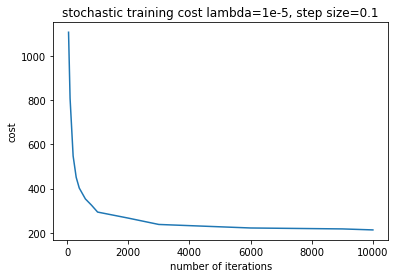

In [281]:
import matplotlib.pyplot as plt
plt.plot([50,100,200,300,400,600,800,1000,2000,3000,6000,9000,10000],costlist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('stochastic training cost lambda=1e-5, step size=0.1')
plt.show()
# Batch gradient descent converges at roughly 200 iterations while SGD takes about 4000 iterations to converge.
# SGD converges slower than Batch, but the run time is smaller.

In [266]:
## tuning lambda and step size using cost function
costdict_stochastic=dict()
for lamb in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]:
    for eps in [1e-5,1e-4,1e-3,1e-2,1e-1,0.5,1]:
        costs=[]
        for iteration in [50,100,200,300,400,600,800,1000,3000]:
            w=stochastic_gradient(np.zeros(13), lamb, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
            costs.append(cost(X_validation.drop(['label'],axis=1), w, lamb,X_validation['label'],reg=False))
        costdict_stochastic[(lamb,eps)]=costs

In [270]:
#only plot 10% of them with lowest cost
interested_stochastic=dict()
for i in costdict_stochastic:
    if costdict_stochastic[i][-1]<np.percentile([costdict_stochastic[i][-1] for i in costdict_stochastic],10):
        interested_stochastic[i]=costdict_stochastic[i]

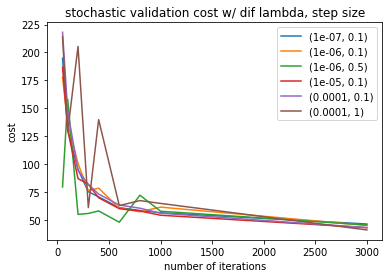

In [271]:
for i in interested_stochastic:
    plt.plot([50,100,200,300,400,600,800,1000,3000],costdict_stochastic[i],label=i)
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('stochastic validation cost w/ dif lambda, step size')
plt.show()
#several of them are similar, so one optimal combination is lambda:1e-5, step size=0.5

In [80]:
## down below are my experiments with different lambda, step size using both cost and accuracy
## tuning lambda use cost function
i=0
costlist=[[],[],[],[],[],[],[],[]]
for lamb in [1e-7,1e-5,1e-3,1e-1,0.5,1,3,5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=stochastic_gradient(np.zeros(13), lamb, 1e-2, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        costlist[i].append(cost(X_validation.drop(['label'],axis=1), w, lamb,X_validation['label'],reg=False))
    i+=1

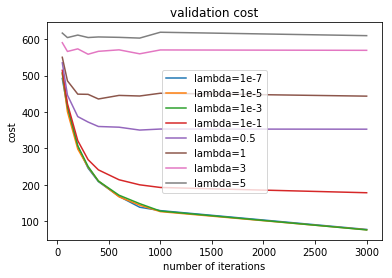

In [81]:
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[0],label=('lambda=1e-7'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[1],label=('lambda=1e-5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[2],label=('lambda=1e-3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[3],label=('lambda=1e-1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[4],label=('lambda=0.5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[5],label=('lambda=1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[6],label=('lambda=3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist[7],label=('lambda=5'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation cost')
plt.show()
#choose lambda=1e-3

In [84]:
## tuning step size using cost function
i=0
costlist2=[[],[],[],[],[],[],[],[]]
for eps in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0.5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=stochastic_gradient(np.zeros(13), 0.001, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        costlist2[i].append(cost(X_validation.drop(['label'],axis=1), w, 0.001,X_validation['label'],False))
    i+=1

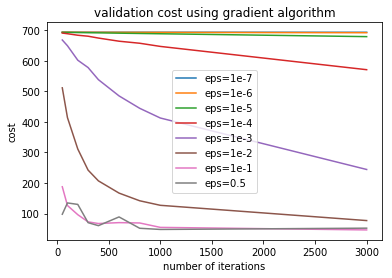

In [85]:
#draw cost function, tuning eps
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[0],label=('eps=1e-7'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[1],label=('eps=1e-6'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[2],label=('eps=1e-5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[3],label=('eps=1e-4'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[4],label=('eps=1e-3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[5],label=('eps=1e-2'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[6],label=('eps=1e-1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],costlist2[7],label=('eps=0.5'))

plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation cost using gradient algorithm')
plt.show()
#choose step size=0.5/1e-1

In [73]:
## tuning lambda using accuracy
i=0
accuracy=[[],[],[],[],[],[],[],[]]
for lamb in [1e-7,1e-5,1e-3,1e-1,0.5,1,3,5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=stochastic_gradient(np.zeros(13), lamb, 1e-2, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        prediction=classifier(X_validation.drop(['label'],axis=1),w)
        actual=X_validation['label']
        accuracy[i].append(sum(prediction==actual)/len(prediction))
    i+=1


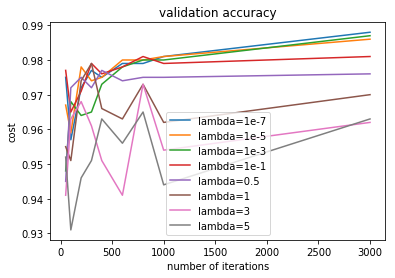

In [74]:
# accuracy plot tuning lambda
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[0],label=('lambda=1e-7'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[1],label=('lambda=1e-5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[2],label=('lambda=1e-3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[3],label=('lambda=1e-1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[4],label=('lambda=0.5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[5],label=('lambda=1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[6],label=('lambda=3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[7],label=('lambda=5'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation accuracy')
plt.show()
## optimal lambda = 1e-7



In [75]:
## tuning step size using accuracy
i=0
accuracy=[[],[],[],[],[],[],[],[]]
for eps in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0.5]:
    for iteration in [50,100,200,300,400,600,800,1000,3000]:
        w=stochastic_gradient(np.zeros(13), 0.001, eps, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        prediction=classifier(X_validation.drop(['label'],axis=1),w)
        actual=X_validation['label']
        accuracy[i].append(sum(prediction==actual)/len(prediction))
    i+=1

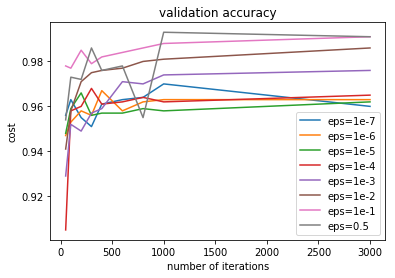

In [87]:
# accuracy plot tuning esp/step size
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[0],label=('eps=1e-7'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[1],label=('eps=1e-6'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[2],label=('eps=1e-5'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[3],label=('eps=1e-4'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[4],label=('eps=1e-3'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[5],label=('eps=1e-2'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[6],label=('eps=1e-1'))
plt.plot([50,100,200,300,400,600,800,1000,3000],accuracy[7],label=('eps=0.5'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation accuracy')
plt.show()
#optimal step size = 1e-1

### 5) shrinking step size

In [88]:
def stochastic_gradient_shrinking(starting_point, lamb, theta, X,y, iterations):
    weights=[starting_point]
    curr=starting_point
    for i in range(iterations):
        j=np.random.choice(X.shape[0])
        row=np.array(X.iloc[j])
        curr=curr-(theta/(i+1))*(lamb*curr-row*(y[j]-scipy.special.expit(np.dot(row,curr))))
        weights.append(curr)
    return weights

In [255]:
#Here I use lambda=0.01, delta=44.4
#Hyperparameter tuning/validation process below the graph
np.random.seed(189)
costlist=[]
for iteration in [50,100,200,300,400,600,800,1000,2000,3000,6000]:
    costs=[]
    for i in range(10):  
        w=stochastic_gradient_shrinking(np.zeros(13), 0.01, 44.4, designX, y, iteration)[-1]
        costs.append(cost(designX, w, 0.1,y,True))
    costlist.append(np.mean(costs))


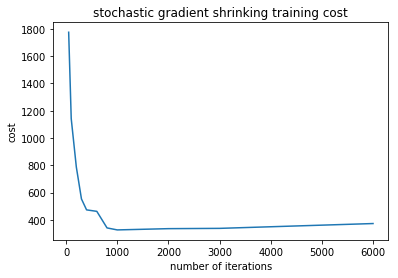

In [257]:
import matplotlib.pyplot as plt
plt.plot([50,100,200,300,400,600,800,1000,2000,3000,6000],costlist)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('stochastic gradient shrinking training cost')
plt.show()
#Here I use lambda=0.01, delta=44.4
#it converges roughly at 1000 iterations while SGD converges at roughly 3000 iterations
#with shrinking step size, stochastic gradient descent converges much faster

In [252]:

## tuning lambda and step size using cost function
costdict_shrinking=dict()
for lamb in [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]:
    for theta in np.linspace(1e-3,50,10):
        costs=[]
        for iteration in [50,100,200,300,400,600,800,1000,3000]:
            w=stochastic_gradient_shrinking(np.zeros(13), lamb, theta, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
            costs.append(cost(X_validation.drop(['label'],axis=1), w, theta,X_validation['label'],reg=False))
        costdict_shrinking[(lamb,theta)]=costs
        
        

In [253]:
#only plot 10% of them with lowest cost
interested_shrinking=dict()
for i in costdict_shrinking:
    if costdict_shrinking[i][-1]<np.percentile([costdict_shrinking[i][-1] for i in costdict_shrinking],10):
        interested_shrinking[i]=costdict_shrinking[i]

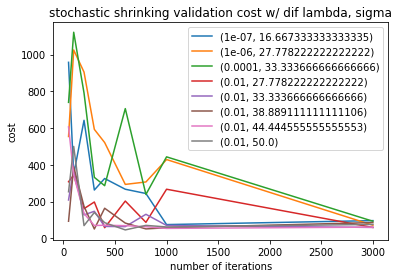

In [254]:
for i in interested_shrinking:
    plt.plot([50,100,200,300,400,600,800,1000,3000],costdict_shrinking[i],label=i)
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('stochastic shrinking validation cost w/ dif lambda, sigma')
plt.show()
#several of them are similar, so optimal combination is lambda:0.01, sigma=44.4

In [129]:
## below just me experimenting with lambda and delta
## tuning theta using accuracy
i=0
accuracy=[[],[],[],[],[],[],[],[],[],[]]
for theta in np.linspace(1e-3,200,10):
    for iteration in [50,100,200,300,400,600,800,1000,3000,6000,10000,20000]:
        w=stochastic_gradient_shrinking(np.zeros(13), 0.001, theta, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        prediction=classifier(X_validation.drop(['label'],axis=1),w)
        actual=X_validation['label']
        accuracy[i].append(sum(prediction==actual)/len(prediction))
    i+=1

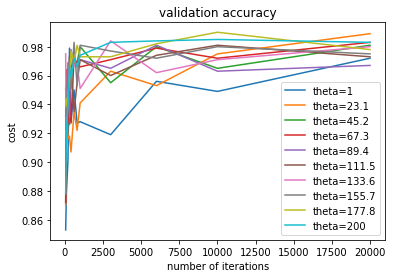

In [130]:
# accuracy plot tuning esp/step size
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[0],label=('theta=1'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[1],label=('theta=23.1'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[2],label=('theta=45.2'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[3],label=('theta=67.3'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[4],label=('theta=89.4'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[5],label=('theta=111.5'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[6],label=('theta=133.6'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[7],label=('theta=155.7'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[8],label=('theta=177.8'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],accuracy[9],label=('theta=200'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation accuracy')
plt.show()
#optimal theta = 23.1

In [131]:
## tuning theta using cost
i=0
costlist=[[],[],[],[],[],[],[],[],[],[]]
for theta in np.linspace(1e-3,200,10):
    for iteration in [50,100,200,300,400,600,800,1000,3000,6000,10000,20000]:
        w=stochastic_gradient_shrinking(np.zeros(13), 0.001, theta, X_train.drop(['label'],axis=1), X_train['label'], iteration)[-1]
        costlist[i].append(cost(X_validation.drop(['label'],axis=1), w, 0.001,X_validation['label'],False))
    i+=1

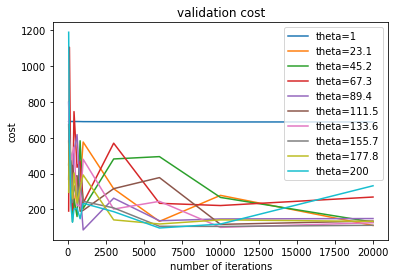

In [132]:
#draw cost function, tuning eps
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[0],label=('theta=1'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[1],label=('theta=23.1'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[2],label=('theta=45.2'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[3],label=('theta=67.3'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[4],label=('theta=89.4'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[5],label=('theta=111.5'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[6],label=('theta=133.6'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[7],label=('theta=155.7'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[8],label=('theta=177.8'))
plt.plot([50,100,200,300,400,600,800,1000,3000,6000,10000,20000],costlist[9],label=('theta=200'))
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.title('validation cost')
plt.show()
#optimal theta 111.5 roughly


### part6 kaggle

In [379]:
#I decide to use stochastic_gradient algorithm with lambda 0.001, step size 0.112
#This parameter is chosen by validation process(accuracy analysis) above.
w=stochastic_gradient(np.zeros(13), 0.001, 0.112, designX, y, 3000)[-1]
sum(classifier(designX,w)==y)/len(y)


0.98999999999999999

In [278]:
test=pd.DataFrame(wine['X_test'])
test=(test-test.mean())/test.std()
test['12']=1

In [386]:
pred=classifier(test,w)

In [385]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [387]:
results_to_csv(pred)